In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

In [25]:
from sklearn.decomposition import PCA

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [27]:
pca = PCA(2)  #project from 64 dimensions to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


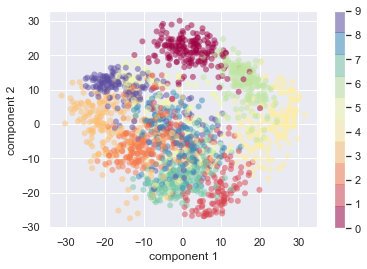

In [28]:
plt.scatter(projected[:,0], projected[:,1],c=digits.target,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

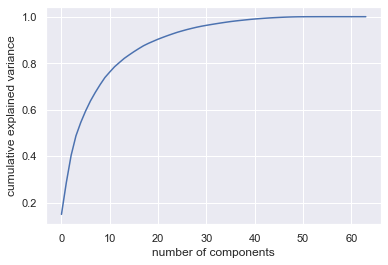

In [29]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

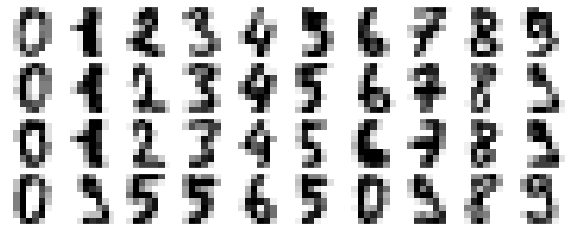

In [30]:
def plot_digits(data):
    fig,axes = plt.subplots(4, 10, figsize=(10, 4)
                            ,subplot_kw={'xticks':[],'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary', interpolation='nearest',clim=(0,16))
plot_digits(digits.data)

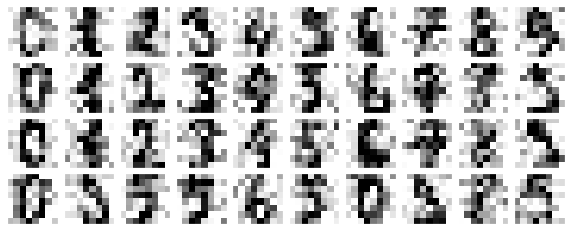

In [31]:
np.random.seed(42)
noisy = np.random.normal(digits.data,4)
plot_digits(noisy)

In [32]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

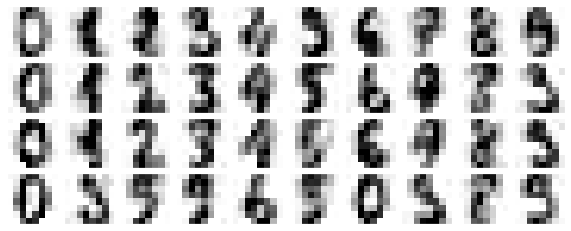

In [33]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)